The data and project problem was obtained from DataCamp.

# Finding the best chocolate bars

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [2]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install fancyimpute
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from fancyimpute import KNN
from sklearn.impute import SimpleImputer
import missingno as msno

# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')



In [3]:
# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [5]:
# descriptive statistics of the data
df.describe(include='all')

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
count,2530.000000,2530,2530,2530.000000,2530,2530,2530.000000,2443.000000,2443,2530,2530.000000
unique,NaN,580,67,NaN,62,1605,NaN,NaN,21,2487,NaN
top,NaN,Soma,U.S.A.,NaN,Venezuela,Madagascar,NaN,NaN,"B,S,C","spicy, cocoa",NaN
freq,NaN,56,1136,NaN,253,55,NaN,NaN,999,4,NaN
mean,1429.800791,NaN,NaN,2014.374308,NaN,NaN,71.639723,3.041343,NaN,NaN,3.196344
std,757.648556,NaN,NaN,3.968267,NaN,NaN,5.616724,0.913728,NaN,NaN,0.445321
min,5.000000,NaN,NaN,2006.000000,NaN,NaN,42.000000,1.000000,NaN,NaN,1.000000
25%,802.000000,NaN,NaN,2012.000000,NaN,NaN,70.000000,2.000000,NaN,NaN,3.000000
50%,1454.000000,NaN,NaN,2015.000000,NaN,NaN,70.000000,3.000000,NaN,NaN,3.250000
75%,2079.000000,NaN,NaN,2018.000000,NaN,NaN,74.000000,4.000000,NaN,NaN,3.500000


In [6]:
# Number of missing values in each column
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

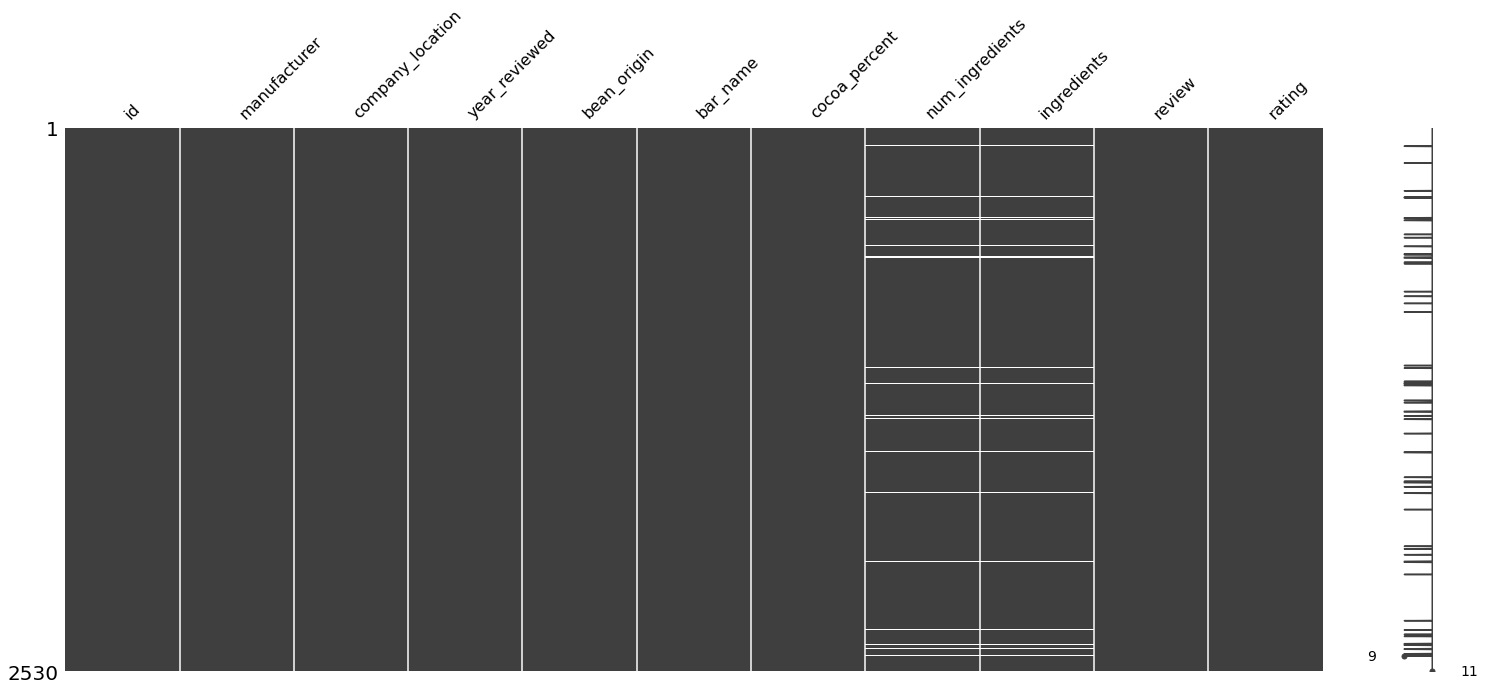

In [7]:
# plot of missing values in each column
msno.matrix(df)

In [8]:
# encoding the categorical column 'ingredients' to enable imputation of missing values
ingredients_not_null = df[df['ingredients'].notnull()]['ingredients']
reshaped_ingredients = ingredients_not_null.values.reshape(-1,1)
encoder = OrdinalEncoder()
encoded_vals = encoder.fit_transform(reshaped_ingredients)
df.loc[ingredients_not_null.index, 'ingredients'] = np.squeeze(encoded_vals)

In [9]:
# imputing missing values using KNN and the mode of the ingredients column
knn = KNN()
imputer = SimpleImputer(strategy='most_frequent')
knn_imputed = df.copy(deep=True)
imputer_imputed = df.copy(deep=True)
knn_imputed.loc[:, 'ingredients'] = np.squeeze(knn.fit_transform(knn_imputed.ingredients.values.reshape(-1,1)))
imputer_imputed.loc[:, 'ingredients'] = np.squeeze(imputer.fit_transform(imputer_imputed.ingredients.values.reshape(-1,1)))

Imputing row 1/2530 with 0 missing, elapsed time: 0.335
Imputing row 101/2530 with 0 missing, elapsed time: 0.335
Imputing row 201/2530 with 0 missing, elapsed time: 0.336
Imputing row 301/2530 with 0 missing, elapsed time: 0.336
Imputing row 401/2530 with 0 missing, elapsed time: 0.336
Imputing row 501/2530 with 0 missing, elapsed time: 0.336
Imputing row 601/2530 with 0 missing, elapsed time: 0.336
Imputing row 701/2530 with 0 missing, elapsed time: 0.337
Imputing row 801/2530 with 0 missing, elapsed time: 0.337
Imputing row 901/2530 with 0 missing, elapsed time: 0.337
Imputing row 1001/2530 with 0 missing, elapsed time: 0.337
Imputing row 1101/2530 with 0 missing, elapsed time: 0.337
Imputing row 1201/2530 with 0 missing, elapsed time: 0.338
Imputing row 1301/2530 with 0 missing, elapsed time: 0.338
Imputing row 1401/2530 with 0 missing, elapsed time: 0.338
Imputing row 1501/2530 with 0 missing, elapsed time: 0.338
Imputing row 1601/2530 with 0 missing, elapsed time: 0.339
Imputing 

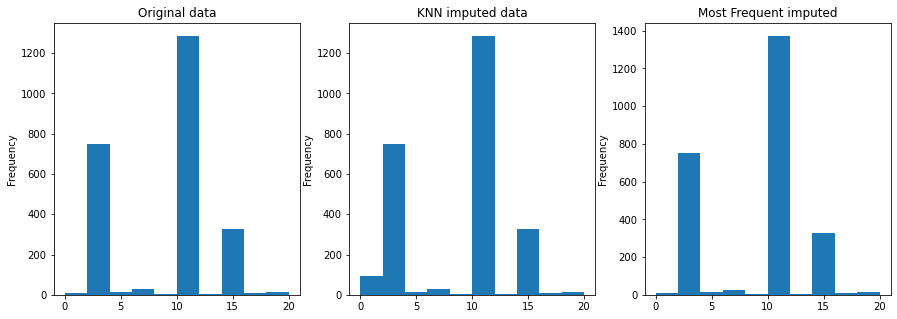

In [10]:
# plotting the distribution of the data before and after imputation
fig, ax = plt.subplots(1,3, figsize=(15,5))
df.ingredients.astype('float').plot.hist(ax=ax[0], title='Original data')
knn_imputed.ingredients.astype('float').plot.hist(ax=ax[1], title='KNN imputed data')
imputer_imputed.ingredients.astype('float').plot.hist(ax=ax[2], title = 'Most Frequent imputed')
plt.show()

In [11]:
# transforming the encoded ingredients column to its original values and filling missing values in the num_ingredients column using the KNN-imputed ingredients column.
knn_imputed['ingredients'] = encoder.inverse_transform(knn_imputed.ingredients.values.reshape(-1,1))
knn_imputed.num_ingredients.fillna(value=knn_imputed.ingredients.str.split(',').apply(len), inplace=True)

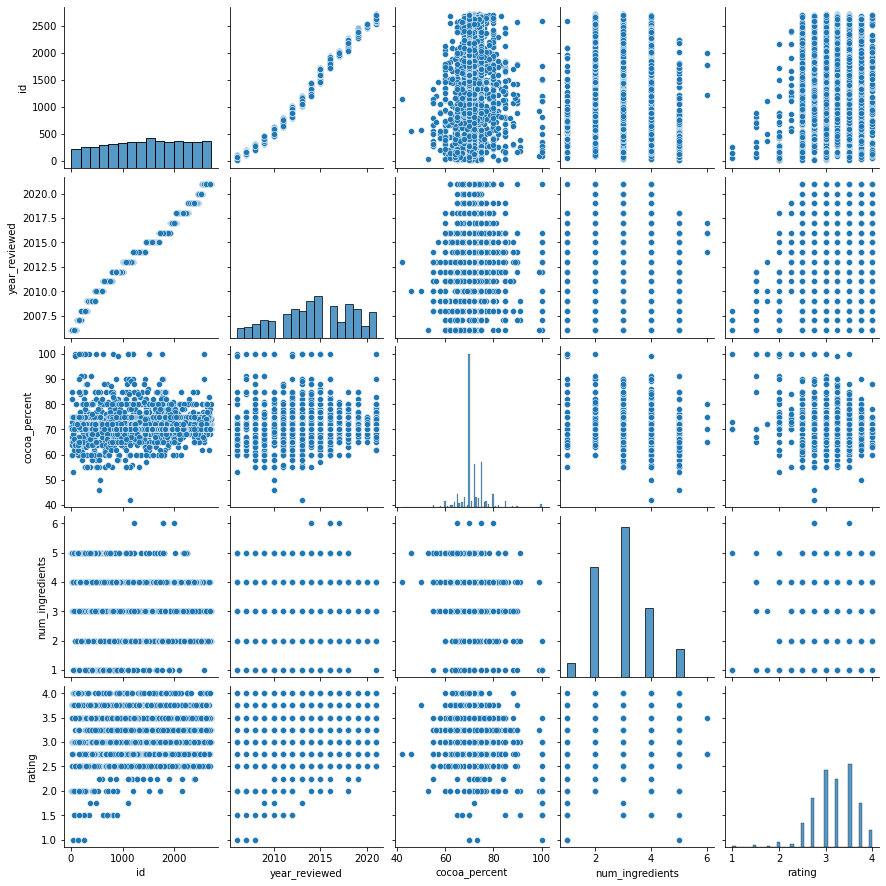

In [12]:
# pairplot of numerical columns in the data
sns.pairplot(knn_imputed)

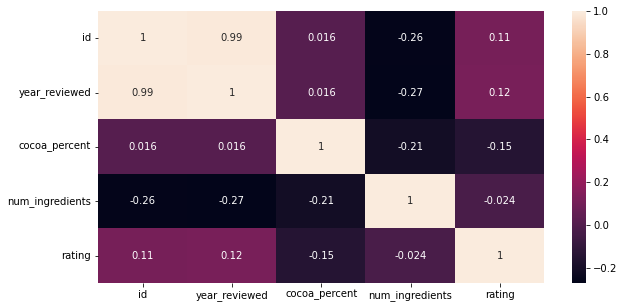

In [13]:
# correlation plot of numerical columns in the data.
plt.figure(figsize=(10,5))
sns.heatmap(knn_imputed.corr(), annot=True)

#### Average Rating by Country of Origin

In [14]:
# grouping the data by Country of bean_origin and calculating the number of bars and mean rating for each country.
ratings_by_origin = knn_imputed.groupby('bean_origin')['rating'].agg(['count', 'mean']).sort_values('mean', ascending=False).reset_index()
ratings_by_origin.columns = ['bean_origin', 'num_bars', 'mean_rating']

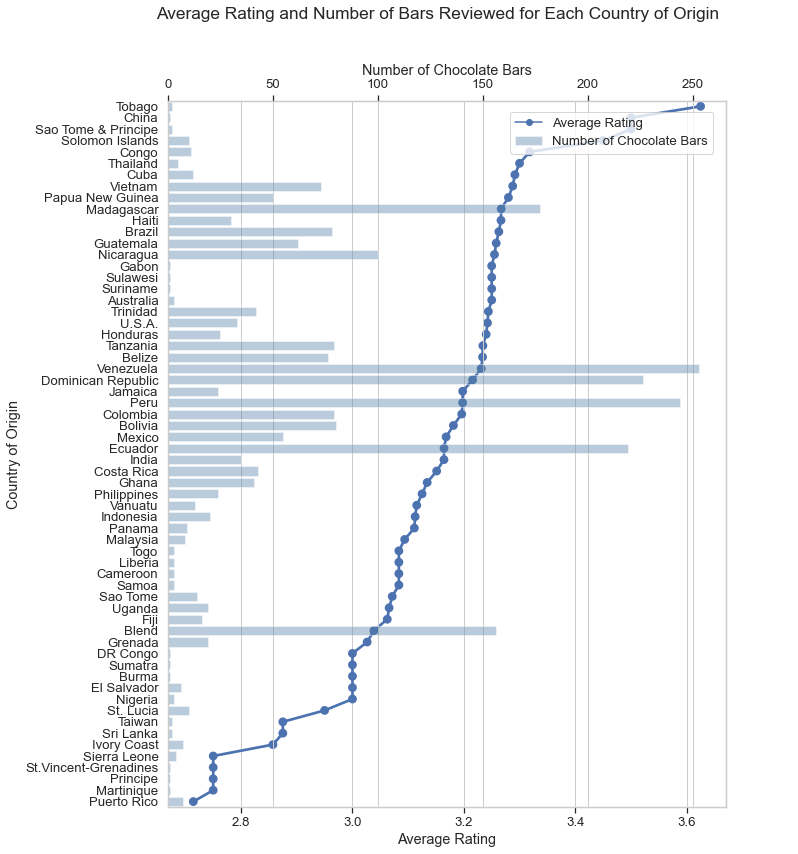

In [15]:
# plotting the average rating and number of bars reviewed for each country of origin
sns.set(font_scale=1.2, style='whitegrid')
fig= plt.figure(figsize=(10,13))
ax=fig.add_subplot(111)
g = sns.pointplot(x='mean_rating', y='bean_origin', data=ratings_by_origin, ax=ax, label='Average Rating')
ax.plot([],[], marker = 'o', label='Average Rating')
g.set_xlabel('Average Rating')
g.set_ylabel('Country of Origin')
ax1 = ax.twiny()
h = sns.barplot(x='num_bars', y='bean_origin', data=ratings_by_origin, ax=ax1, alpha=0.4, color='steelblue', label='Number of Chocolate Bars')
h.set_xlabel('Number of Chocolate Bars')
fig.suptitle('Average Rating and Number of Bars Reviewed for Each Country of Origin')
fig.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.8))
plt.show()

### Ratings by Cocoa Content

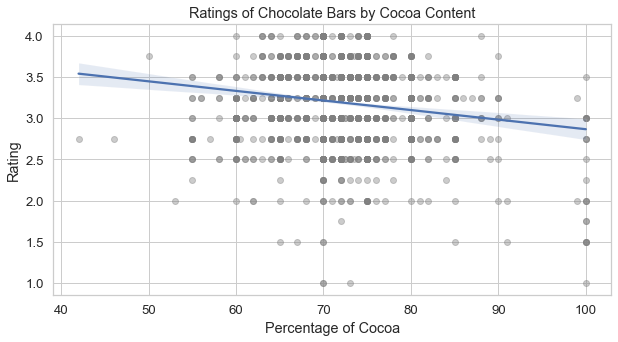

In [16]:
# scatterplot of the rating and cocoa content of each chocolate bar
plt.figure(figsize=(10, 5))
g = sns.regplot(x='cocoa_percent', y='rating', data=knn_imputed, scatter_kws={'alpha': 0.4, 'color': 'grey'})
g.set_title('Ratings of Chocolate Bars by Cocoa Content')
g.set_xlabel('Percentage of Cocoa')
g.set_ylabel('Rating')
plt.show()

In [17]:
# average cocoa content for bars with ratings less than or equal to 3.5
print('Average Cocoa Content for Bars with Ratings Less than or Equal to 3.5: \n', round(knn_imputed[knn_imputed.rating <= 3.5]['cocoa_percent'].mean(),2))

Average Cocoa Content for Bars with Ratings Less than or Equal to 3.5: 
 71.77


In [18]:
# average cocoa content for bars with ratings greater than 3.5
print('Average Cocoa Content for Bars with Ratings Greater than 3.5: \n', round(knn_imputed[knn_imputed.rating > 3.5]['cocoa_percent'].mean(),2))

Average Cocoa Content for Bars with Ratings Greater than 3.5: 
 70.95


In [19]:
# average cocoa content for each rating greater than 3.5
knn_imputed[knn_imputed.rating > 3.5].groupby('rating')['cocoa_percent'].mean().reset_index()

,rating,cocoa_percent
0,3.75,71.041667
1,4.00,70.696429


### Average Rating of Bars with and without Lecithin (L)

In [20]:
# creating a column that identifies if a bar contains Lecithin or not
knn_imputed['lecithin_content'] = np.where(knn_imputed.ingredients.str.contains('L'), 'With Lecithin', 'Without Lecithin')

In [21]:
# Average rating of bars with and without Lecithin
knn_imputed.groupby('lecithin_content')['rating'].mean().reset_index()

,lecithin_content,rating
0,With Lecithin,3.150609
1,Without Lecithin,3.207413


### Summary of Findings

1. Bars without Lecithin had a slightly higher average rating than bars that contained Lecithin.
2. Bars with higher ratings, on average, had less cocoa content than bars with lower ratings.
3. Average rating of chocolate bars differed by country of bean origin.